**Prediction of the next word by the preceeding 16 words**    

This preprocessing is based on Dict 2.5 (Keiko updated).



In [ ]:
ver = 21099;

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd "gdrive/My Drive/Colab/NLP"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
[Errno 2] No such file or directory: 'gdrive/My Drive/Colab/NLP'
/content/gdrive/My Drive/Colab/NLP


In [ ]:
import numpy as np
np.set_printoptions(threshold=np.inf)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import preprocessing

In [ ]:
print(tf.__version__)

2.11.0


In [ ]:
#### load text data file #####
import nltk

In [ ]:
nltk.download('gutenberg')
text_=[]
text_.append( nltk.corpus.gutenberg.raw('carroll-alice.txt') )
text_.append( nltk.corpus.gutenberg.raw('austen-emma.txt') )
text_.append( nltk.corpus.gutenberg.raw('austen-persuasion.txt') )
text_.append( nltk.corpus.gutenberg.raw('austen-sense.txt') )
text_.append( nltk.corpus.gutenberg.raw('melville-moby_dick.txt') )
text_.append( nltk.corpus.gutenberg.raw('burgess-busterbrown.txt') ) # children's book, "The Adventures of Buster Bear" "Fun with Farmer Brown's Boy"
text_.append( nltk.corpus.gutenberg.raw('edgeworth-parents.txt') ) # children's book, "The Parent's Assistant", 1796
text_br = nltk.corpus.gutenberg.raw('bryant-stories.txt')  # "Stories to Tell to Children", by Sara Cone Bryant 1918

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


In [ ]:
txt_1 = """My name is Anne. I am a Japanese high school student. I came to live in America with my family two weeks ago. One day Mother asked me about my school life. I answered that I enjoyed it very much. But that was not true. I didn't want Mother to worry about me. I always said to myself, "I live in two worlds, one at home and the other at school. They are very different. At home I speak Japanese and live a happy Japanese life with my family. I feel that school is far away when I am at home. In class at school teachers sometimes speak English so fast that I don't understand them. I want to talk with a friend about that, but I don't have any friends. Every day I wait for a student who will talk to me." The next day in art class the teacher stopped at my desk and said, "Akiko, your picture is very wonderful! " Then many students came to see my picture. After the art class one girl student came to me. At last a student talked to me! She said, "Hi, Anne. I'm Suzzan. I would like to talk with you after school." I was very happy. I said, "Yes, of course." After school we went to Mary's house and began to talk. Mary was also interested in drawing pictures. We talked about a lot of things. When I talked about my idea of the two worlds, Mary said, "I didn't know that. But you can ask teachers to speak more slowly. If you want to make your school life happy, you should try to say something to us. We will help you any time." I had a very good time with Mary. I ran home to tell Mother about my new friend, but she was not there. Soon Mother came home. "Mother, where have you been? "I asked. "I have been to English school. I began to learn English, " answered Mother. "You don't have to learn English so hard because you stay home every day, " I said. "I want to make friends to learn about America and tell them a lot about Japan, " said Mother. "Mary and Mother have the same idea, " I thought. " Today I learned an important thing from Mary and Mother. It is not good to stay in our small world when we are in a foreign culture. I will try hard to make my school life happy."
Relearning the art of seeing the world around us is quite simple, although it takes practice and requires breaking some bad abits. And "relearn" is the correct word. Most of us observed much more as children than we do as adults. A child's day is filled with newness and wonder. The desire to explore, to have an adventure, gave us all a natural ability to be aware of the world around us.
But as adults we are slow to be stimulated by new ideas and new situations. We fail to see the wonder of the things around us. The first step in awakening our senses is to rediscover the ability to observe that we had as children. To do so we need to stop anticipating what we are going to see and feel before it happens. Such anticipation blocks our ability to feel. For example, one chilly night I was on a mountain hike with some students. I told them that we were going to have to cross a mountain stream. They began to grumble about how cold it would be. We reached the stream and they reluctantly plunged ahead. They were almost up to their knees in the water when they realized that I had led them into a hot spring. Later they all said that they had felt cold water at first. We also need to notice signs which can help us see more. Once I was on a hike, following about six meters behind my Indian friend named John. As we passed under a huge pine tree. he turned around and said, "Don't disturb it." Surprised, I looked everywhere. Was there a deer, a fox, or something else that I had missed seeing? Finally I looked into the branches of the tree and saw a beautiful owl not three meters from us. I was amazed that Stalking Wolf had known it was there without looking up. When I asked him how he had known the owl was there, he replied, "Go ask the mice." By looking down he had seen the tracks of the mice that had run away from their dreaded enemy, the owl. The next time you take a walk, no matter where it is, open up your eyes. Be aware of all the sights, sounds and sensations. You will be surprised at the many beautiful and interesting things you have been missing. """

In [ ]:
text_br = text_br.replace("Here's", "Here is");   text_br = text_br.replace("here's", "here is");   text_br = text_br.replace("I'm", "I am");   text_br = text_br.replace("I'd", "I would");   text_br = text_br.replace("I've", "I have");   text_br = text_br.replace("I'll", "I will");    text_br = text_br.replace("that's", "that is");   text_br = text_br.replace("That's", "That is");     text_br = text_br.replace("What's", "What is");   text_br = text_br.replace("You'll", "You will");   text_br = text_br.replace("you'll", "you will");  text_br = text_br.replace("It's", "It is");   text_br = text_br.replace("it's", "it is");  text_br = text_br.replace("It'll", "It will");   text_br = text_br.replace("it'll", "it will");  text_br = text_br.replace("You're", "You are");  text_br = text_br.replace("you're", "you are");   text_br = text_br.replace("You've", "You have");  text_br = text_br.replace("you've", "you have");   text_br = text_br.replace("You've", "You have");
text_br = text_br.replace("We'll", "We will");   text_br = text_br.replace("we'll", "we will");  text_br = text_br.replace("She'll", "She will");   text_br = text_br.replace("she'll", "she will");  text_br = text_br.replace("He'll", "He will");  text_br = text_br.replace("he'll", "he will");  text_br = text_br.replace("They'll", "They will");  text_br = text_br.replace("they'll", "they will");   text_br = text_br.replace("They're", "They are");  text_br = text_br.replace("they're", "they are");  text_br = text_br.replace("They've", "They have");  text_br = text_br.replace("they've", "they have");
text_br = text_br.replace("don't", "do not");   text_br = text_br.replace("doesn't", "does not");   text_br = text_br.replace("didn't", "did not");   text_br = text_br.replace("isn't", "is not");   text_br = text_br.replace("wasn't", "was not");   text_br = text_br.replace("aren't", "are not");  text_br = text_br.replace("hasn't", "has not");    text_br = text_br.replace("haven't", "have not");  text_br = text_br.replace("hadn't", "had not");   text_br = text_br.replace("won't", "will not");
text_br = text_br.replace("can't", "can not");  text_br = text_br.replace("cannot", "can not");  text_br = text_br.replace("shouldn't", "should not");  text_br = text_br.replace("wouldn't", "would not");  text_br = text_br.replace(" Miss ", " dr ");    text_br = text_br.replace(" Pip ", " john ");
text_br = text_br.replace("'", "");     # for 'bryant-stories.txt'

In [ ]:
text = ''
for i in range(len(text_)):     text = text + text_[i]
text = text + text_br + txt_1

In [ ]:
text = text.replace('\r\n', ' ');  text = text.replace('\n', ' ');   # \n is inserted not at the end of sentence.
text = text.replace("Here's", "Here is");   text = text.replace("here's", "here is");   text = text.replace("I'm", "I am");   text = text.replace("I'd", "I would");   text = text.replace("I've", "I have");   text = text.replace("I'll", "I will");    text = text.replace("that's", "that is");   text = text.replace("That's", "That is");     text = text.replace("What's", "What is");
text = text.replace("We'll", "We will");   text = text.replace("we'll", "we will");  text = text.replace("You'll", "You will");   text = text.replace("you'll", "you will");  text = text.replace("It's", "It is");   text = text.replace("it's", "it is");  text = text.replace("It'll", "It will");   text = text.replace("it'll", "it will");  text = text.replace("You're", "You are");  text = text.replace("you're", "you are");   text = text.replace("You've", "You have");  text = text.replace("you've", "you have");   text = text.replace("You've", "You have");
text = text.replace("She'll", "She will");   text = text.replace("she'll", "she will");  text = text.replace("He'll", "He will");  text = text.replace("he'll", "he will");  text = text.replace("They'll", "They will");  text = text.replace("they'll", "they will");   text = text.replace("They're", "They are");  text = text.replace("they're", "they are");  text = text.replace("They've", "They have");  text = text.replace("they've", "they have");
text = text.replace("don't", "do not");   text = text.replace("doesn't", "does not");   text = text.replace("didn't", "did not");   text = text.replace("isn't", "is not");   text = text.replace("wasn't", "was not");   text = text.replace("aren't", "are not");  text = text.replace("hasn't", "has not");    text = text.replace("haven't", "have not");  text = text.replace("hadn't", "had not");   text = text.replace("won't", "will not");  text = text.replace("can't", "can not");  text = text.replace("cannot", "can not");  text = text.replace("shouldn't", "should not");  text = text.replace("wouldn't", "would not");
text = text.replace("gonna", "going to");   text = text.replace("wanna", "want to");   text = text.replace(" Miss ", " dr ");   text = text.replace(" Pip ", " john ");


In [ ]:
nltk.download('punkt')
text = nltk.tokenize.sent_tokenize(text) ## generating sentenses

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
##### preprocessing: selecting sentences #####
import re
sents1 = [];
for line in range(len(text)):
    words = text[line].split()    # text[line] will be converted to lists of words
    if (len(words) >= 3):
        line_s = re.split(r'[:;]',text[line]);
        if len(line_s)>1:        ## finding multiple sentenses in one line
            for i in range(len(line_s)):
                if len(line_s[i])>4:    sents1.append(line_s[i])
        else:  sents1.append(text[line]);

In [ ]:
nltk.download('brown')
text_b,sents2=[],[]
text_b.append( nltk.corpus.brown.sents(categories='adventure') )
text_b.append( nltk.corpus.brown.sents(categories='news') )
text_b.append( nltk.corpus.brown.sents(categories='belles_lettres') )
text_b.append( nltk.corpus.brown.sents(categories='humor') )
text_b.append( nltk.corpus.brown.sents(categories='hobbies') )
text_b.append( nltk.corpus.brown.sents(categories='reviews') )
text_b.append( nltk.corpus.brown.sents(categories='romance') )
text_b.append( nltk.corpus.brown.sents(categories='science_fiction') )
text_b.append( nltk.corpus.brown.sents(categories='mystery') )
text_b.append( nltk.corpus.brown.sents(categories='fiction') )

for i in range(len(text_b)):
    for ln in range(len(text_b[i])):
        line = ' '.join(text_b[i][ln]) ## text_b is lists of words (in brown corpus)
        line = line.replace("Here's", "Here is");   line = line.replace("here's", "here is");   line = line.replace("I'm", "I am");   line = line.replace("I'd", "I would");   line = line.replace("I've", "I have");   line = line.replace("I'll", "I will");    line = line.replace("that's", "that is");   line = line.replace("That's", "That is");     line = line.replace("What's", "What is");   line = line.replace("there's", "there is");   line = line.replace("There's", "There is");
        line = line.replace("We'll", "We will");   line = line.replace("we'll", "we will");  line = line.replace("You'll", "You will");   line = line.replace("you'll", "you will");  line = line.replace("It's", "It is");   line = line.replace("it's", "it is");  line = line.replace("It'll", "It will");   line = line.replace("it'll", "it will");  line = line.replace("You're", "You are");  line = line.replace("you're", "you are");   line = line.replace("You've", "You have");  line = line.replace("you've", "you have");   line = line.replace("You've", "You have");
        line = line.replace("She'll", "She will");   line = line.replace("she'll", "she will");  line = line.replace("He'll", "He will");  line = line.replace("he'll", "he will");  line = line.replace("They'll", "They will");  line = line.replace("they'll", "they will");   line = line.replace("They're", "They are");  line = line.replace("they're", "they are");  line = line.replace("They've", "They have");  line = line.replace("they've", "they have");
        line = line.replace("don't", "do not");   line = line.replace("doesn't", "does not");   line = line.replace("didn't", "did not");   line = line.replace("isn't", "is not");   line = line.replace("wasn't", "was not");   line = line.replace("aren't", "are not");  line = line.replace("hasn't", "has not");    line = line.replace("haven't", "have not");  line = line.replace("hadn't", "had not");   line = line.replace("won't", "will not");  line = line.replace("can't", "can not");  line = line.replace("cannot", "can not");  line = line.replace("shouldn't", "should not");  line = line.replace("couldn't", "could not");  line = line.replace("wouldn't", "would not");
        line = line.replace("gonna", "going to");   line = line.replace("wanna", "want to");     line = line.replace(" Miss ", " dr ");   line = line.replace(" Pip ", " john ");
        sents2.append(line)

sents = sents2 + sents1

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


In [ ]:
######## remove text within parentheses ############
for i in range(len(sents)):
    sents[i] = re.sub("[\(\[].*?[\)\]]", "", sents[i])
    sents[i] = re.sub(r"[0-9]+", "0", sents[i])

In [ ]:
for i in range(len(sents)):
    if (type(sents[i]) != str):  continue
    sents[i] = sents[i].lower()
    sents[i] = ' ' + sents[i]
    sents[i] = sents[i].replace("'s", "s ");  sents[i] = sents[i].replace("'twas", " it was ");
    sents[i] = sents[i].replace("have'n't", " have not ");   sents[i] = sents[i].replace("ev'n", " even ");
    sents[i] = sents[i].replace("o'er", " over ");   sents[i] = sents[i].replace("sha'n't", " shall not ");
    sents[i] = sents[i].replace("""'""", "");
    sents[i] = sents[i].replace(".", " "); sents[i] = sents[i].replace("?", " ");  sents[i] = sents[i].replace("!", " ");    sents[i] = sents[i].replace(""" " """, """ """);  sents[i] = sents[i].replace("&", " and ");
    sents[i] = sents[i].replace('''"''', ' " ');
    sents[i] = sents[i].replace("*", " ");  sents[i] = sents[i].replace("_", " ");sents[i] = sents[i].replace("`", " ");  sents[i] = sents[i].replace(",", " ");  sents[i] = sents[i].replace(".", " ");   sents[i] = sents[i].replace(";", " ");  sents[i] = sents[i].replace(":", " ");  sents[i] = sents[i].replace("?", " ");  sents[i] = sents[i].replace("!", " ");
    sents[i] = sents[i].replace("&", " and "); sents[i] = sents[i].replace('''"''', ' " ');   sents[i] = sents[i].replace(""" " " """, """ " """);

    sents[i] = sents[i].replace("- -", "--");  sents[i] = sents[i].replace("----", "--");  sents[i] = sents[i].replace("--", " -- ");
    sents[i] = sents[i].replace(" 0-", " 0 ");  sents[i] = sents[i].replace("0", " 0 ");  sents[i] = sents[i].replace("  ", " ");  sents[i] = sents[i].replace("  ", " ");  sents[i] = sents[i].replace(" 0 d ", " 0 ");  sents[i] = sents[i].replace(" 0 s ", " 0 ");  sents[i] = sents[i].replace(" 0 st ", " 0 ");  sents[i] = sents[i].replace(" 0 th ", " 0 ");  sents[i] = sents[i].replace(" 0 0 ", " 0 ");  sents[i] = sents[i].replace(" 0 0 ", " 0 ");  sents[i] = sents[i].replace(" 0 0 ", " 0 ");  sents[i] = sents[i].replace(" $ 0 0 ", " 0 dollar ");  sents[i] = sents[i].replace(" $ 0 ", " 0 dollar ");
    sents[i] = sents[i].replace("   ", " ");  sents[i] = sents[i].replace("   ", " ");  sents[i] = sents[i].replace("   ", " ");  sents[i] = sents[i].replace(" 0 ", " zero ");
    sents[i] = sents[i].replace(" b ", " ");   sents[i] = sents[i].replace(" c ", " ");  sents[i] = sents[i].replace(" d ", " ");  sents[i] = sents[i].replace(" e ", " ");  sents[i] = sents[i].replace(" f ", " ");  sents[i] = sents[i].replace(" g ", " ");  sents[i] = sents[i].replace(" h ", " ");  sents[i] = sents[i].replace(" j ", " ");  sents[i] = sents[i].replace(" k ", " ");  sents[i] = sents[i].replace(" l ", " ");  sents[i] = sents[i].replace(" m ", " ");   sents[i] = sents[i].replace(" n ", " ");   sents[i] = sents[i].replace(" o ", " ");   sents[i] = sents[i].replace(" p ", " ");  sents[i] = sents[i].replace(" q ", " ");  sents[i] = sents[i].replace(" r ", " ");  sents[i] = sents[i].replace(" s ", " ");   sents[i] = sents[i].replace(" t ", " ");  sents[i] = sents[i].replace(" u ", " ");   sents[i] = sents[i].replace(" v ", " ");  sents[i] = sents[i].replace(" w ", " ");  sents[i] = sents[i].replace(" z ", " ");

    sents[i] = sents[i].replace(" pre-", " pre"); sents[i] = sents[i].replace(" mama ", " mother "); sents[i] = sents[i].replace(" em ", " them ");  sents[i] = sents[i].replace(" morrow ", " tomorrow "); sents[i] = sents[i].replace(" to-morrow", " tomorrow")
    sents[i] = sents[i].replace(" de ", "  ");  sents[i] = sents[i].replace(" don ", "  ");  sents[i] = sents[i].replace(" jr ", "  ");  sents[i] = sents[i].replace(" mr ", " dr ");  sents[i] = sents[i].replace(" mrs ", " dr ");  sents[i] = sents[i].replace(" sir ", " dr ");  sents[i] = sents[i].replace(" st ", " dr ");  sents[i] = sents[i].replace(" ah ", "  ");  sents[i] = sents[i].replace(" anneounced ", " announced ");  sents[i] = sents[i].replace(" anti-", " anti");  sents[i] = sents[i].replace(" co ", " cooperation ");  sents[i] = sents[i].replace(" damn it ", " damnit ");  sents[i] = sents[i].replace(" damn war ", " war ");  sents[i] = sents[i].replace(" good bye ", " goodbye ");  sents[i] = sents[i].replace(" hey ", " hi ");  sents[i] = sents[i].replace(" o ", " of ");  sents[i] = sents[i].replace(" oh ", "  ");  sents[i] = sents[i].replace(" re-", " re");  sents[i] = sents[i].replace(" san ", " san");   sents[i] = sents[i].replace(" sperm whale", " whale");
    sents[i] = sents[i].replace(" aint ", " are not ");  sents[i] = sents[i].replace(" aj ", "  ");  sents[i] = sents[i].replace(" ann ", " anne ");   sents[i] = sents[i].replace(" ay ", " yes ");  sents[i] = sents[i].replace(" aye ", " yes ");  sents[i] = sents[i].replace(" by the bye ", "  ");  sents[i] = sents[i].replace(" couldnt ", " could not ");  sents[i] = sents[i].replace(" damndue to ", " because of ");  sents[i] = sents[i].replace(" dont ", " do not ");  sents[i] = sents[i].replace(" em  ", " them ");  sents[i] = sents[i].replace(" ere ", " before ");  sents[i] = sents[i].replace(" hitherto ", " until now ");  sents[i] = sents[i].replace(" nay ", " no "); sents[i] = sents[i].replace(" nigh ", " near ");  sents[i] = sents[i].replace(" re ", " about ");   sents[i] = sents[i].replace(" till ", " until ");  sents[i] = sents[i].replace(" tis ", " it is ");  sents[i] = sents[i].replace(" whats ", " what is ");  sents[i] = sents[i].replace(" ye ", " you ");  sents[i] = sents[i].replace(" yes aye ", "  ");  sents[i] = sents[i].replace(" your majesty ", " you ");  sents[i] = sents[i].replace(" thou canst ", " you can ");  sents[i] = sents[i].replace(" thou hast ", " you have ");  sents[i] = sents[i].replace(" thee ", " you ");  sents[i] = sents[i].replace(" thou ", " you ");  sents[i] = sents[i].replace(" thoust ", " you have ");  sents[i] = sents[i].replace(" thy ", " your ");
    sents[i] = sents[i].replace(" hed be ", " he would be ");  sents[i] = sents[i].replace(" hed been ", " he had been ");  sents[i] = sents[i].replace(" hed come ", " he would come ");  sents[i] = sents[i].replace(" hed creep ", " he would  creep ");  sents[i] = sents[i].replace(" hed decided ", " he had decided ");  sents[i] = sents[i].replace(" hed do ", " he would  do ");  sents[i] = sents[i].replace(" hed give ", " he would give ");  sents[i] = sents[i].replace(" hed got ", " he had got ");  sents[i] = sents[i].replace(" hed had ", " he had had ");  sents[i] = sents[i].replace(" hed have ", " he would have ");  sents[i] = sents[i].replace(" hed leave ", " he would leave ");  sents[i] = sents[i].replace(" hed left ", " he had left ");  sents[i] = sents[i].replace(" hed meet ", " he would meet ");  sents[i] = sents[i].replace(" hed not care ", " he would not care ");  sents[i] = sents[i].replace(" hed take ", " he would take ");  sents[i] = sents[i].replace(" hed tell ", " he would tell ");  sents[i] = sents[i].replace(" hed told ", " he had told ");  sents[i] = sents[i].replace(" youd decided ", " you had decided ");  sents[i] = sents[i].replace(" youd learned ", " you had learned ");  sents[i] = sents[i].replace(" youd missed ", " you had missed ");
    sents[i] = sents[i].replace(" abra ", " smith ");  sents[i] = sents[i].replace(" ada ", " johnson ");  sents[i] = sents[i].replace(" adams ", " smith ");  sents[i] = sents[i].replace(" baker ", " smith ");  sents[i] = sents[i].replace(" barton ", " smith ");  sents[i] = sents[i].replace(" batess ", " williams ");  sents[i] = sents[i].replace(" benwick ", " williams ");  sents[i] = sents[i].replace(" bildad ", " smith ");  sents[i] = sents[i].replace(" burke ", " williams ");  sents[i] = sents[i].replace(" bursal ", " williams ");  sents[i] = sents[i].replace(" captain harville ", " johnson ");  sents[i] = sents[i].replace(" captain wentworth ", " johnson ");  sents[i] = sents[i].replace(" carlo ", " johnson ");  sents[i] = sents[i].replace(" celies ", " johnson ");  sents[i] = sents[i].replace(" clayton ", " williams ");  sents[i] = sents[i].replace(" dashwood ", " smith ");  sents[i] = sents[i].replace(" dashwoods ", " johnson ");  sents[i] = sents[i].replace(" donwell ", " williams ");  sents[i] = sents[i].replace(" doyle ", " williams ");  sents[i] = sents[i].replace(" edwards ", " williams ");  sents[i] = sents[i].replace(" eltons ", " smith ");  sents[i] = sents[i].replace(" estherson ", " johnson ");  sents[i] = sents[i].replace(" fairfax ", " williams ");  sents[i] = sents[i].replace(" felix ", " williams ");  sents[i] = sents[i].replace(" frederick ", " johnson ");  sents[i] = sents[i].replace(" garland ", " smith ");  sents[i] = sents[i].replace(" gresham ", " johnson ");  sents[i] = sents[i].replace(" grey ", " williams ");  sents[i] = sents[i].replace(" hardwick ", " smith ");  sents[i] = sents[i].replace(" hartfield ", " johnson ");  sents[i] = sents[i].replace(" jennings ", " smith ");  sents[i] = sents[i].replace(" jones ", " smith ");  sents[i] = sents[i].replace(" joseph ", " smith ");  sents[i] = sents[i].replace(" kennedy ", " johnson ");  sents[i] = sents[i].replace(" kiz ", " smith ");  sents[i] = sents[i].replace(" kizzie ", " johnson ");  sents[i] = sents[i].replace(" knightley ", " johnson ");  sents[i] = sents[i].replace(" langford ", " williams ");  sents[i] = sents[i].replace(" lee ", " smith ");  sents[i] = sents[i].replace(" lewis ", " smith ");  sents[i] = sents[i].replace(" loveit ", " williams ");  sents[i] = sents[i].replace(" martin ", " williams ");  sents[i] = sents[i].replace(" maude ", " smith ");  sents[i] = sents[i].replace(" middleton ", " smith ");  sents[i] = sents[i].replace(" miss johnson ", " dr johnson ");  sents[i] = sents[i].replace(" miss smith ", " dr smith ");  sents[i] = sents[i].replace(" miss williams ", " dr williams ");  sents[i] = sents[i].replace(" morgan ", " johnson ");  sents[i] = sents[i].replace(" murphy ", " johnson ");  sents[i] = sents[i].replace(" musgrove ", " williams ");  sents[i] = sents[i].replace(" musgroves ", " williams ");  sents[i] = sents[i].replace(" norland ", " williams ");  sents[i] = sents[i].replace(" palmer ", " johnson ");  sents[i] = sents[i].replace(" peleg ", " johnson ");  sents[i] = sents[i].replace(" piedro ", " smith ");  sents[i] = sents[i].replace(" pulova ", " smith ");  sents[i] = sents[i].replace(" queequeg ", " williams ");  sents[i] = sents[i].replace(" roberts ", " johnson ");  sents[i] = sents[i].replace(" rossoff ", " williams ");  sents[i] = sents[i].replace(" russell ", " johnson ");  sents[i] = sents[i].replace(" schwarzkopf ", " johnson ");  sents[i] = sents[i].replace(" shirley ", " williams ");  sents[i] = sents[i].replace(" stuart ", " johnson ");  sents[i] = sents[i].replace(" sutherland ", " williams ");  sents[i] = sents[i].replace(" talbot ", " williams ");  sents[i] = sents[i].replace(" tamiris ", " smith ");  sents[i] = sents[i].replace(" tarlton ", " johnson ");  sents[i] = sents[i].replace(" taylor ", " smith ");  sents[i] = sents[i].replace(" vaughan ", " johnson ");  sents[i] = sents[i].replace(" vieth ", " williams ");  sents[i] = sents[i].replace(" walter ", " williams ");  sents[i] = sents[i].replace(" watson ", " johnson ");  sents[i] = sents[i].replace(" wentworth ", " williams ");  sents[i] = sents[i].replace(" weston ", " smith ");  sents[i] = sents[i].replace(" westons ", " smiths ");  sents[i] = sents[i].replace(" wheeler ", " smith ");  sents[i] = sents[i].replace(" willoughby ", " johnson ");  sents[i] = sents[i].replace(" wilson ", " williams ");  sents[i] = sents[i].replace(" winston ", " williams ");  sents[i] = sents[i].replace(" woodhouse ", " smith ");  sents[i] = sents[i].replace(" xydis ", " johnson ");
    sents[i] = sents[i].replace(" annee ", " jane ");  sents[i] = sents[i].replace(" annees ", " janes ");  sents[i] = sents[i].replace(" barbara ", " jane ");  sents[i] = sents[i].replace(" bates ", " emma ");  sents[i] = sents[i].replace(" betsy ", " alice ");  sents[i] = sents[i].replace(" cecilia ", " alice ");  sents[i] = sents[i].replace(" eileen ", " emma ");  sents[i] = sents[i].replace(" elinor ", " jane ");  sents[i] = sents[i].replace(" elinors ", " janes ");  sents[i] = sents[i].replace(" folly ", " emma ");  sents[i] = sents[i].replace(" glenda ", " alice ");  sents[i] = sents[i].replace(" harriet ", " jane ");  sents[i] = sents[i].replace(" harriets ", " janes ");  sents[i] = sents[i].replace(" henrietta ", " jane ");  sents[i] = sents[i].replace(" isabella ", " emma ");  sents[i] = sents[i].replace(" jen ", " jane ");  sents[i] = sents[i].replace(" joan ", " alice ");  sents[i] = sents[i].replace(" julia ", " emma ");  sents[i] = sents[i].replace(" kate ", " jane ");  sents[i] = sents[i].replace(" katherine ", " alice ");  sents[i] = sents[i].replace(" laura ", " emma ");  sents[i] = sents[i].replace(" leonora ", " alice ");  sents[i] = sents[i].replace(" linda ", " jane ");  sents[i] = sents[i].replace(" louisa ", " jane ");  sents[i] = sents[i].replace(" margaret ", " alice ");  sents[i] = sents[i].replace(" mariannee ", " alice ");  sents[i] = sents[i].replace(" mariannee ", " jane ");  sents[i] = sents[i].replace(" mariannees ", " janes ");  sents[i] = sents[i].replace(" mary ", " jane ");  sents[i] = sents[i].replace(" miss alice ", " dr alice ");  sents[i] = sents[i].replace(" miss emma ", " dr emma ");  sents[i] = sents[i].replace(" miss jane ", " dr jane ");  sents[i] = sents[i].replace(" rachel ", " alice ");  sents[i] = sents[i].replace(" rosamond ", " alice ");  sents[i] = sents[i].replace(" sophy ", " alice ");  sents[i] = sents[i].replace(" susan ", " emma ");  sents[i] = sents[i].replace(" susans ", " emmas ");  sents[i] = sents[i].replace(" theresa ", " emma ");
    sents[i] = sents[i].replace(" ahab ", " elliot ");  sents[i] = sents[i].replace(" ahabs ", " elliots ");  sents[i] = sents[i].replace(" ahalexander ", " elton ");  sents[i] = sents[i].replace(" ahtom ", " elliot ");  sents[i] = sents[i].replace(" alfred ", " elliot ");  sents[i] = sents[i].replace(" bildad ", " elton ");  sents[i] = sents[i].replace(" billy ", " edward ");  sents[i] = sents[i].replace(" captain benwick ", " edward ");  sents[i] = sents[i].replace(" captain bildad ", " elton ");  sents[i] = sents[i].replace(" captain peleg ", " elliot ");  sents[i] = sents[i].replace(" charles ", " elton ");  sents[i] = sents[i].replace(" charlie ", " elton ");  sents[i] = sents[i].replace(" churchill ", " elliot ");  sents[i] = sents[i].replace(" david ", " elton ");  sents[i] = sents[i].replace(" francisco ", " edward ");  sents[i] = sents[i].replace(" franklin ", " edward ");  sents[i] = sents[i].replace(" george ", " elton ");  sents[i] = sents[i].replace(" hal ", " elton ");  sents[i] = sents[i].replace(" hans ", " elliot ");  sents[i] = sents[i].replace(" hartfield ", " smith ");  sents[i] = sents[i].replace(" jack ", " edward ");  sents[i] = sents[i].replace(" james ", " edward ");  sents[i] = sents[i].replace(" jem ", " elliot ");  sents[i] = sents[i].replace(" jonah ", " elliot ");  sents[i] = sents[i].replace(" lawrence ", " elton ");  sents[i] = sents[i].replace(" louis ", " edward ");  sents[i] = sents[i].replace(" mike ", " elton ");  sents[i] = sents[i].replace(" nayopeleg ", " elliot ");  sents[i] = sents[i].replace(" paul ", " edward ");  sents[i] = sents[i].replace(" perry ", " elton ");  sents[i] = sents[i].replace(" peter ", " eliot ");  sents[i] = sents[i].replace(" phil ", " elliot ");  sents[i] = sents[i].replace(" philip ", " edward ");  sents[i] = sents[i].replace(" richard ", " elton ");  sents[i] = sents[i].replace(" robert ", " elliot ");  sents[i] = sents[i].replace(" sam ", " edward ");  sents[i] = sents[i].replace(" sammy ", " edward ");  sents[i] = sents[i].replace(" starbuck ", " elton ");  sents[i] = sents[i].replace(" tashtego ", " elliot ");  sents[i] = sents[i].replace(" the hatter ", " eliot ");  sents[i] = sents[i].replace(" the tailor ", " elton ");  sents[i] = sents[i].replace(" thomas ", " elliot ");  sents[i] = sents[i].replace("  ", " ");
    sents[i] = sents[i].replace(" brahmin ", " man ");  sents[i] = sents[i].replace(" britain ", " england ");  sents[i] = sents[i].replace(" british ", " english ");  sents[i] = sents[i].replace(" dormouse ", " mouse ");  sents[i] = sents[i].replace(" gingerbread boy ", " gingerbreadboy ");  sents[i] = sents[i].replace(" guinea-", "guinea");  sents[i] = sents[i].replace(" guinea pig ", " guineapig ");  sents[i] = sents[i].replace(" guineahatter ", " man ");  sents[i] = sents[i].replace(" harpooneer ", " man ");  sents[i] = sents[i].replace(" harpooneers ", " men ");  sents[i] = sents[i].replace(" highbury ", " paris ");  sents[i] = sents[i].replace(" leviathan ", " monster ");  sents[i] = sents[i].replace(" little fir tree ", " little tree ");  sents[i] = sents[i].replace(" look-outs ", " lookouts ");  sents[i] = sents[i].replace(" maam ", " madam ");  sents[i] = sents[i].replace(" mamma ", " mother ");  sents[i] = sents[i].replace(" mast-heads ", " mastheads ");  sents[i] = sents[i].replace(" moby dick ", " the whale ");  sents[i] = sents[i].replace(" morrow ", " tomorrow ");  sents[i] = sents[i].replace(" new guinea ", " newguinea ");  sents[i] = sents[i].replace(" papa ", " father ");  sents[i] = sents[i].replace(" pequods ", " ships ");  sents[i] = sents[i].replace(" pequods boats ", " ships ");  sents[i] = sents[i].replace(" randalls ", " paris ");  sents[i] = sents[i].replace(" san francisco ", " sanfrancisco ");  sents[i] = sents[i].replace(" seamen ", " men ");  sents[i] = sents[i].replace(" soviet union ", " soviet ");  sents[i] = sents[i].replace(" the guinea ", " the dollar ");  sents[i] = sents[i].replace(" the pequod ", " the ship ");  sents[i] = sents[i].replace(" whaleman ", " man ");  sents[i] = sents[i].replace(" whalemen ", " men ");  sents[i] = sents[i].replace(" young gentleman ", " young man ");


In [ ]:
#### removing chapter header ###
for i in range(len(sents)):
     if (type(sents[i]) != str):  continue
     if sents[i][:8].find('chapter') != -1:  sents[i] = "";
     elif sents[i].find(') chapter ') != -1:  sents[i] = "";
     elif sents[i][:6].find('page ') != -1:  sents[i] = "";
     elif sents[i].find('[illustration') != -1:  sents[i] = "";

In [ ]:
#### removing afer (" said), (e.g. "I will do" said alice.) ###
for i in range(len(sents)):
     if (type(sents[i]) != str):  continue
     if sents[i].find('" said ') != -1:  sents[i] = sents[i][:sents[i].find('" said ')];

In [ ]:
#### removing French sentences ###
for i in range(len(sents)):
     if (type(sents[i]) != str):  continue
     if sents[i].find(' la ') != -1:  sents[i] = "";
     elif sents[i].find(' non ') != -1:  sents[i] = "";

In [ ]:
#### removing sentences contains hi gentlemen/gentleman sir damn or af ###
for i in range(len(sents)):
     if (type(sents[i]) != str):  continue
     if sents[i].find(' hi ') != -1:  sents[i] = "";  ## <40 sentences
     elif sents[i].find(' gentlemen ') != -1:  sents[i] = "";
     elif sents[i].find(' a d 0 ') != -1:  sents[i] = "";
     elif sents[i].find(' af ') != -1:  sents[i] = "";
     elif sents[i][:6].find('said ') != -1:  sents[i] = "";
    #  elif sents[i].find(' damn ') != -1:  sents[i] = "";

In [ ]:
##### preprocessing: tokenizing #####
num_words = 3000
tokenizer = preprocessing.text.Tokenizer(oov_token='unk')
tokenizer.fit_on_texts(sents)
tokenizer.word_index = {e:i for e,i in tokenizer.word_index.items() if i <= num_words} ####
tokenizer.word_index[tokenizer.oov_token] = num_words + 1 #### These two lines are necessary to remove rare words
w_idx = tokenizer.word_index
w_idx['_'] = 0;   w_idx['unk'] = 1;
idx_to_word = dict([(value, key) for (key, value) in w_idx.items()])

In [ ]:
print(w_idx)

{'unk': 1, 'the': 2, 'and': 3, 'of': 4, 'to': 5, 'a': 6, 'in': 7, 'was': 8, 'i': 9, 'he': 10, 'it': 11, 'that': 12, 'not': 13, 'his': 14, 'for': 15, 'you': 16, 'is': 17, 'as': 18, 'her': 19, 'with': 20, 'had': 21, 'be': 22, 'she': 23, 'but': 24, 'at': 25, 'on': 26, 'have': 27, 'dr': 28, 'all': 29, 'this': 30, 'him': 31, 'by': 32, 'they': 33, 'from': 34, 'so': 35, 'would': 36, 'were': 37, 'one': 38, 'which': 39, 'no': 40, 'will': 41, 'there': 42, 'are': 43, 'or': 44, 'my': 45, 'could': 46, 'do': 47, 'an': 48, 'what': 49, 'been': 50, 'when': 51, 'zero': 52, 'me': 53, 'their': 54, 'them': 55, 'very': 56, 'if': 57, 'more': 58, 'out': 59, 'who': 60, 'up': 61, 'said': 62, 'we': 63, 'now': 64, 'can': 65, 'little': 66, 'did': 67, 'your': 68, 'than': 69, 'then': 70, 'any': 71, 'some': 72, 'into': 73, 'time': 74, 'about': 75, 'only': 76, 'like': 77, 'has': 78, 'man': 79, 'such': 80, 'must': 81, 'much': 82, 'well': 83, 'other': 84, 'smith': 85, 'good': 86, 'how': 87, 'before': 88, 'know': 89, 'ja

In [ ]:
len(w_idx)

3001

In [ ]:
##### time steps of the preceeding words #####
time_step = 16;

In [ ]:
sents = tokenizer.texts_to_sequences(sents);

In [ ]:
seq_length = 2 * time_step;
sents = preprocessing.sequence.pad_sequences(sents, maxlen=seq_length-time_step+1, padding='pre', truncating='post')
sents = np.concatenate( (np.zeros((np.size(sents,0),time_step-1)),sents), axis=1)

In [ ]:
sents_0 = sents
np.shape(sents_0)

(88711, 32)

In [ ]:
sents = sents[np.sum(sents>0,axis=1)>2,:]  # removing too short sentences

In [ ]:
sents = sents[np.sum(sents[:,0:time_step+12]==w_idx['unk'],axis=1)<4,:]  # excluding too many unk

In [ ]:
np.shape(sents)

(79444, 32)

In [ ]:
##### shuffling sentenses #####
sents = np.random.permutation(sents);         sent_2 = sents +0;

In [ ]:
##### preparing training dataset #####
batch_size = 64;

In [ ]:
##### training data and validation data #######
train_val_rate = 0.90; # 90% for training, 10% for validation
train_start = 0;                train_end = round(len(sents) * train_val_rate)
val_start = train_end + 1;      val_end = len(sents);

In [ ]:
def sample_generator(start, end):
    # while True:
    for ep in range(10000):
        start0 = start + (ep%2)*(batch_size//2);  end0 = end - batch_size + (ep%2)*(batch_size//2);
        if ep%2 == 0 and start<train_end:     sent_2[train_start:train_end,:] = np.random.permutation(sent_2[train_start:train_end,:])
        elif ep> 0 and start>train_end:       sent_2[val_start:val_end,:] = np.random.permutation(sent_2[val_start:val_end,:])
        for step in range((end0 - start0) // batch_size):
            x, y = [],[]
            for line in range(batch_size):
                dataset = preprocessing.sequence.TimeseriesGenerator(
                    sent_2[start0+step*batch_size+line],
                    sent_2[start0+step*batch_size+line],  length=time_step,   batch_size=1)
                for batch in dataset:
                    X, Y = batch;      x.extend(X[0]);     y.extend(Y);
            x = np.reshape(x,((seq_length-time_step)*batch_size,time_step))
            y = keras.utils.to_categorical(y, len(w_idx))
            yield x, y

In [ ]:
val_batch_size = batch_size;

In [ ]:
def sample_generator_evaluation(start, end):
    for step in range((end - start) // val_batch_size):
        x, y = [],[]
        for line in range(val_batch_size):
            dataset = preprocessing.sequence.TimeseriesGenerator(
                sents[start+step*val_batch_size+line],   sents[start+step*val_batch_size+line],  length=time_step,   batch_size=1)
            for batch in dataset:     X, Y = batch;   x.extend(X[0]);   y.extend(Y);
        x = np.reshape(x,((seq_length-time_step)*val_batch_size,time_step))
        y = keras.utils.to_categorical(y, len(w_idx))
        yield x, y

In [ ]:
###################### Buliding ANN Model #####################################################

In [ ]:
dp_rate = 0.0; dp_through_rate = 0.0;
gr_scale = 1;   min_fb_gr_b = - 0.5;  max_fb_gr_b = 0.0;
p_cell = 192;
leaky_relu = 0.02;      sqrt_leak = 1; # (0 or 1) sqrt_leak should be 1, if gr_scale > 1
p_relu_on = 0; p_relu = 0.0;

In [ ]:
if leaky_relu > 0 and sqrt_leak == 1:         leaky_relu_in = np.sqrt(leaky_relu);    leaky_relu_pc = np.sqrt(leaky_relu);
elif leaky_relu > 0:                          leaky_relu_in = 1.0;                    leaky_relu_pc = leaky_relu;
elif leaky_relu == 0 and p_relu_on == 1:      leaky_relu_in = 1.0;                    leaky_relu_pc = 0.0; # dummy (p-relu for pc),
else:                                         leaky_relu_in = 0.0;                    leaky_relu_pc = 0.0; # ReLU in PC and input cells,  ## when leaky_relu == 0 and p_relu_on == 0:
leaky_relu_out = 1.0;

In [ ]:
ind_pos = max_fb_gr_b // ((max_fb_gr_b-min_fb_gr_b) /gr_scale);
cANN_DM = 0;

In [ ]:
class custom_RNNCell(layers.AbstractRNNCell):
    def __init__(self, units,  **kwargs):
        super(custom_RNNCell, self).__init__(**kwargs)
        self.units = units
        self.prelu = tf.keras.layers.PReLU(alpha_initializer=tf.initializers.constant(p_relu))

    @property
    def state_size(self):
        return self.units

    def build(self, input_shape):
        self.w_ff_1 = self.add_weight( shape=(input_shape[-1], self.units), constraint=keras.constraints.NonNeg(),
            initializer='he_normal',     name='kernel_1') # glorot_uniform, he_normal, orthogonal,
        self.w_ff_2 = self.add_weight( shape=(input_shape[-1], self.units), constraint=keras.constraints.NonNeg(),
            initializer='he_normal',     name='kernel_2') # glorot_uniform, he_normal, orthogonal,
        self.w_pc2out = self.add_weight( shape=(self.units, self.units),
            initializer='identity', trainable=False,    name='recurrent_w0')
        self.w_out2in = self.add_weight( shape=(self.units, self.units * gr_scale),
            initializer='identity', trainable=False,    name='recurrent_w1')
        self.w_out2in = tf.concat([tf.eye(self.units) for i in range(gr_scale)],1) # producing multiple copies of states in input layer
        self.b_r_in = self.add_weight( shape=(self.units * gr_scale,),
            name='recurrent_bias',  trainable=False,    initializer='zeros')   # for recurrent input cells
        self.b_r_in = tf.concat([tf.fill([self.units,], (min_fb_gr_b-max_fb_gr_b)*(i-ind_pos)/gr_scale) for i in range(gr_scale)],0) # multiple bias values for different gr populations
        self.w_in2pc_1 = self.add_weight( shape=(self.units * gr_scale, self.units), constraint=keras.constraints.NonNeg(),
            initializer='he_normal',    trainable=True, name='recurrent_w21') #  # recurrent kernel
        self.w_in2pc_2 = self.add_weight( shape=(self.units * gr_scale, self.units), constraint=keras.constraints.NonNeg(),
            initializer='he_normal',    trainable=True, name='recurrent_w22') #  # recurrent kernel
        self.bias = self.add_weight( shape=(self.units,),
            name='bias',     initializer='zeros')  # 'glorot_normal', 'zeros', 'he_normal'
        self.built = True

    def call(self, inputs, states):
        # === recurrent activity (pc -> input cells) ======
        act_pc = states[0]
        act_out = tf.matmul(act_pc, self.w_pc2out)
        act_out = tf.nn.leaky_relu(act_pc, alpha = leaky_relu_out)
        act_in = tf.matmul(act_out, self.w_out2in)
        act_in = act_in + self.b_r_in
        act_in = tf.nn.leaky_relu(act_in, alpha = leaky_relu_in)
        # ==== PC activity ====
        h = tf.matmul(inputs, self.w_ff_1) + tf.matmul(inputs, - self.w_ff_2);
        h = h + self.bias;
        pc = h + tf.matmul(act_in, self.w_in2pc_1) + tf.matmul(act_in, - self.w_in2pc_2);
        if leaky_relu == 0 and p_relu_on == 1:          pc = self.prelu(pc)
        else:                                           pc = tf.nn.leaky_relu(pc, alpha = leaky_relu_pc)
        return pc, pc

In [ ]:
##### building the model ######
def seq2vec_model_builder(HIDDEN_DIM):
    ##### input and embedding (one-hot) ######
    encoder_inputs = layers.Input(shape=(time_step, ), dtype='int32',)
    encoder_embedding = layers.Embedding(len(w_idx), len(w_idx), embeddings_initializer='identity', mask_zero=True, trainable=False)(encoder_inputs)
    ##### RNN ##########
    c_cell = custom_RNNCell( HIDDEN_DIM )
    c_cell.initial_state = tf.zeros((1, HIDDEN_DIM), tf.float32)
    encoder_RNN = layers.RNN(c_cell, return_state=True,  name='sRNN')
    encoder_outputs, state_h = encoder_RNN(encoder_embedding)
    ##### output (dense) layer ##########
    dense_layer = layers.Dense(len(w_idx),
                     bias_initializer=keras.initializers.RandomNormal(stddev=0.00001), activation='linear', name='dense_1')
    outputs = dense_layer(encoder_outputs)
    act_layer = tf.keras.layers.Activation('softmax')
    outputs = act_layer( outputs )
    model = keras.Model(encoder_inputs, outputs)
    return model
model = seq2vec_model_builder(HIDDEN_DIM = p_cell)

In [ ]:
inter_output_model = keras.Model(model.input, model.get_layer('sRNN').output )

In [ ]:
model.get_layer('sRNN')

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 16)]              0         
                                                                 
 embedding_1 (Embedding)     (None, 16, 3001)          9006001   
                                                                 
 sRNN (RNN)                  [(None, 192),             1263168   
                              (None, 192)]                       
                                                                 
 dense_1 (Dense)             (None, 3001)              579193    
                                                                 
 activation (Activation)     (None, 3001)              0         
                                                                 
Total params: 10,848,362
Trainable params: 1,805,497
Non-trainable params: 9,042,865
__________________________________________

In [ ]:
increments = 32   ## split epoch (Equivalent to learning the whole sentence once) into XX

In [ ]:
def my_loss(y_true, y_pred):
    row_wise_sum  = tf.reduce_sum(tf.gather(y_true,  [0,1], axis = 1),axis=1)
    valid = tf.reshape(tf.where(tf.equal(row_wise_sum,0)), [-1])
    loss_fn = tf.keras.losses.CategoricalCrossentropy()
    return loss_fn(y_true=tf.gather(y_true,  valid, axis = 0),  y_pred=tf.gather(y_pred,  valid, axis = 0))

In [ ]:
def my_top_k_acc(y_true, y_pred):
    row_wise_sum  = tf.reduce_sum(tf.gather(y_true,  [0,1], axis = 1),axis=1)
    valid = tf.where(tf.equal(row_wise_sum,0))     # removing y_true = 0 or 'unk'
    values, y_ind = tf.nn.top_k(y_true, 1);    values, top_k_pred = tf.nn.top_k(y_pred, 5);
    to_top5 = tf.constant( [[ 1, 1, 1, 1, 1]] , dtype=tf.int32 )
    input_y_for_top5 = tf.matmul( tf.reshape(y_ind,[-1, 1]) , to_top5 )
    correct_preds = tf.cast( tf.equal( input_y_for_top5 , top_k_pred ) , dtype=tf.float16)
    suc_pred = tf.reduce_sum(correct_preds, axis=1);
    return tf.reduce_mean( tf.gather(suc_pred,  tf.squeeze(valid), axis = 0) )

In [ ]:
#### optimizer ######
optimizer = keras.optimizers.Adam(learning_rate=0.0064, clipnorm=8.0) # Adam, Adadelta, RMSprop, Adagrad,
model.compile(loss=my_loss, optimizer=optimizer, run_eagerly=True, metrics=['categorical_crossentropy', my_top_k_acc])

In [ ]:
EarlyStopping = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=increments*10, mode='auto')
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.84, patience=increments//4, min_lr=0.00002)  # faster reduce

In [ ]:
h1 = model.evaluate(sample_generator_evaluation(train_start, train_start+(train_end - train_start) //increments))

34/34 [==============================] - 7s 111ms/step - loss: 8.2304 - categorical_crossentropy: 8.2192 - my_top_k_acc: 8.2998e-04


In [ ]:
h2 = model.evaluate(sample_generator_evaluation(val_start, val_start+(val_end - val_start)//2) )

62/62 [==============================] - 8s 121ms/step - loss: 8.2250 - categorical_crossentropy: 8.2227 - my_top_k_acc: 9.4698e-04


In [ ]:
##### training the model #######
history_callback = model.fit(
    sample_generator(train_start, train_end),
    steps_per_epoch=(train_end - train_start) //increments // batch_size,  # if //80, it comes full circle in increments of 80.
    validation_data=sample_generator(val_start, val_end),
    validation_steps=(val_end - val_start) // batch_size //4,
    initial_epoch=0,
    epochs=increments*8,
    # epochs=4,
    verbose=1,
    callbacks=[ EarlyStopping, reduce_lr] )

Epoch 1/4


34/34 [==============================] - 15s 389ms/step - loss: 6.9841 - categorical_crossentropy: 7.5704 - my_top_k_acc: 0.1368 - val_loss: 6.3963 - val_categorical_crossentropy: 7.2651 - val_my_top_k_acc: 0.1660 - lr: 0.0064
Epoch 2/4
34/34 [==============================] - 11s 321ms/step - loss: 6.2527 - categorical_crossentropy: 7.1900 - my_top_k_acc: 0.1884 - val_loss: 6.1785 - val_categorical_crossentropy: 7.1778 - val_my_top_k_acc: 0.1910 - lr: 0.0064
Epoch 3/4
34/34 [==============================] - 12s 358ms/step - loss: 6.0621 - categorical_crossentropy: 7.0980 - my_top_k_acc: 0.2054 - val_loss: 5.9860 - val_categorical_crossentropy: 7.0313 - val_my_top_k_acc: 0.2154 - lr: 0.0064
Epoch 4/4
34/34 [==============================] - 11s 321ms/step - loss: 5.8708 - categorical_crossentropy: 6.9854 - my_top_k_acc: 0.2374 - val_loss: 5.7694 - val_categorical_crossentropy: 6.9630 - val_my_top_k_acc: 0.2545 - lr: 0.0064


In [ ]:
history_callback.history.keys()

dict_keys(['loss', 'categorical_crossentropy', 'my_top_k_acc', 'val_loss', 'val_categorical_crossentropy', 'val_my_top_k_acc', 'lr'])

In [ ]:
lr = history_callback.history["lr"];    lr = np.array(lr[:1]+lr);

In [ ]:
loss_his = []
loss_his.append( np.array( h1[0:1]+ history_callback.history["loss"] ) )
loss_his.append( np.array( h1[2:]+ history_callback.history["my_top_k_acc"] ) )
loss_his.append( np.array( h2[0:1]+ history_callback.history["val_loss"] ) )
loss_his.append( np.array( h2[2:]+ history_callback.history["val_my_top_k_acc"] ) )

In [ ]:
##### Correct rate of validation in the training period  ######
print(loss_his[3][-4:].tolist())
100*np.mean(loss_his[3][-4:])

[0.16602744162082672, 0.19104397296905518, 0.2154383510351181, 0.2545284032821655]


20.675954222679138

In [ ]:
model.save_weights('./saved_model/model_'+'{0:03d}'.format(ver) + '/checkpoint/')

In [ ]:
import matplotlib.pyplot as plt

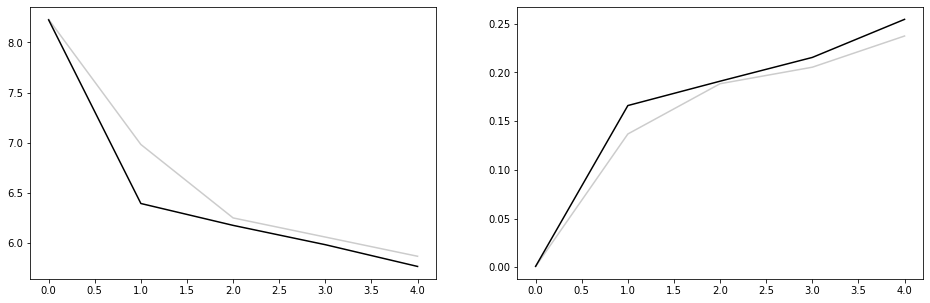

In [ ]:
plt.figure(figsize=(16, 5)) # figure area
plt.subplot(1,2,1)
plt.plot(range(len(loss_his[0])),loss_his[0], color=[0.8, 0.8, 0.8])
plt.plot(range(len(loss_his[2])),loss_his[2], color=[0, 0, 0]);
plt.subplot(1,2,2)
plt.plot(range(len(loss_his[1])),loss_his[1], color=[0.8, 0.8, 0.8])
plt.plot(range(len(loss_his[3])),loss_his[3], color=[0, 0, 0]);

In [ ]:
x, y = [],[]
for line in range(batch_size):
    dataset = preprocessing.sequence.TimeseriesGenerator(
        sents[line],         sents[line],
        length=time_step,    batch_size=1)
    for batch in dataset:
        X, Y = batch;
        x.extend(X[0]);      y.extend(Y)
x = np.reshape(x,((seq_length-time_step)*batch_size,time_step))
y = keras.utils.to_categorical(y, len(w_idx))

In [ ]:
row_wise_sum  = tf.reduce_sum(tf.gather(y,  [0], axis = 1),axis=1)
valid = tf.where(tf.equal(row_wise_sum,0))
y0 = tf.gather(y,  tf.squeeze(valid), axis = 0);

In [ ]:
sents[line]

array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 2.000e+00, 4.310e+02, 7.910e+02, 4.100e+01,
       2.700e+01, 5.000e+00, 2.551e+03, 3.250e+02, 5.000e+00, 1.910e+02,
       1.000e+00, 7.000e+00])

In [ ]:
x, y = [],[]
for line in range(len(sents)):
    for i in range(len(sents[line])-time_step):
        if np.sum(sents[line][i:i+time_step])==0:  continue
        x.append(sents[line][i:i+time_step])
        y.append(sents[line][i+time_step])

In [ ]:
num_ana = 60

states, vocab = [],[]; n_0 = np.zeros(2);   first_w = np.zeros(num_ana);
for j in range(num_ana):
    k = len(x)-num_ana+j;  w_char = [];
    # k = j+100;  w_char = [];
    x_pred = x[k];   x_pred = np.reshape(x_pred,(1, time_step))
    for i in range(time_step):
        w_char.append(idx_to_word[x[k][i]])
    ##### RNN state prediction and converting it to str ######
    rnn_output, rnn_states = inter_output_model.predict(x_pred)
    states.append(rnn_states)
    vocab.append(idx_to_word[x_pred[0,-1]])
    ##### model prediction and converting it to str ######
    prediction = model.predict(x_pred, verbose=0)
    index = np.argsort(-prediction)[:,:10]
    result = ''
    for m in range(np.size(index)):
        result = result + idx_to_word[index[:,m].item()] + ' '
    #### first word detection #####
    n_0[0] = n_0[1];     n_0[1] = np.sum(x_pred == 0);
    if n_0[0] < n_0[1]:
        first_w[j] = 1;
    #### output ####
    char = ' '.join(w_char)
    print(char)
    print('    answer:'+str(idx_to_word[y[k]]))
    print('    prediction:'+str(result))

1/1 [==============================] - 0s 279ms/step
_ unk unk would have been enough to unk the lady who only wanted to be
    answer:going
    prediction:the a to and in of his for as it 
1/1 [==============================] - 0s 47ms/step
unk unk would have been enough to unk the lady who only wanted to be going
    answer:somewhere
    prediction:to of and the in for on a with as 
1/1 [==============================] - 0s 24ms/step
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ so
    answer:bills
    prediction:is i was he had you it she the of 
1/1 [==============================] - 0s 24ms/step
_ _ _ _ _ _ _ _ _ _ _ _ _ _ so bills
    answer:got
    prediction:the to a and of it he i in you 
1/1 [==============================] - 0s 21ms/step
_ _ _ _ _ _ _ _ _ _ _ _ _ so bills got
    answer:to
    prediction:the to a and in it of that his for 
1/1 [==============================] - 0s 24ms/step
_ _ _ _ _ _ _ _ _ _ _ _ so bills got to
    answer:come
    prediction:the be to a and of in it as fo

In [ ]:
s_ori = np.concatenate(states,axis=0);

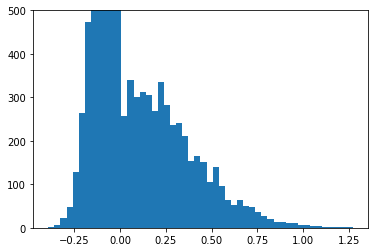

In [ ]:
plt.hist(np.reshape(s_ori,[-1,]), bins=50);
plt.ylim(0,500)
plt.show()

In [ ]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])
w_pc = layer_dict['sRNN'].get_weights()

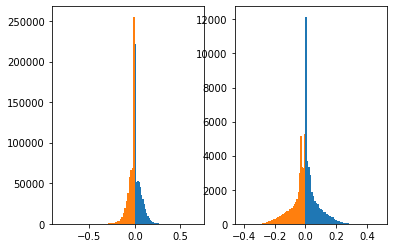

In [ ]:
plt.hist(np.reshape(w_pc[0],[-1,]), bins=50);
plt.hist(np.reshape(-w_pc[1],[-1,]), bins=50);

In [ ]:
plt.hist(np.reshape(w_pc[2],[-1,]), bins=50);
plt.hist(np.reshape(-w_pc[3],[-1,]), bins=50);

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)
pca.fit(s_ori)
s_pca = pca.transform(s_ori)

In [ ]:
s2_pca = np.NaN*np.zeros((2*len(first_w),2));  ii=0;
for i in range(len(first_w)):
    if first_w[i]==1:
        s2_pca[ii] = np.NaN;      ii = ii +1;
    s2_pca[ii,:] = s_pca[i,:];    ii = ii +1;

In [ ]:
GABA_PC = -1;

In [ ]:
inc_tmstep_valrate = [increments, time_step, train_val_rate,lr, gr_scale, dp_rate, min_fb_gr_b, p_cell, dp_through_rate, leaky_relu, p_relu_on, p_relu, sqrt_leak, max_fb_gr_b , cANN_DM, GABA_PC]

In [ ]:
# ========== save in npz file ============
import joblib
dt =  (w_idx, idx_to_word, sents, loss_his, inc_tmstep_valrate)
joblib.dump(dt, './saved_model/np_'+'{0:03d}'.format(ver)+'.pkl', compress=3)

['./saved_model/np_21099.pkl']

In [ ]:
with open('./saved_model/tokenizer_'+'{0:03d}'.format(ver)+'.pkl', 'wb') as handle:
    joblib.dump(tokenizer, handle)